# Pre processing
## Libraries used

In [1]:
import pandas as pd
import seaborn as sns
from scipy import stats
from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import anderson
from sklearn.cluster import KMeans

## Load original data

In [2]:
data=pd.read_csv('C:/Users/juan_/Documents/U/Semestre 13/Models Machine Learning/Project 1/data.csv', index_col=0)

In [3]:
#Explore columns to used on project
df=data.iloc[:,[1,2,4,7,8,10,11,13,20,21,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87]]
df=pd.DataFrame(df)

In [4]:
#Know rows & columns of original dataset
df.shape

(18207, 45)

In [5]:
# Delete all rows which had blank or NaN values
df1=pd.DataFrame(df.dropna())
df1.shape

(16643, 45)

## Basic metrics of data

In [6]:
#Basic metrics of dataset
df1['Wage'] = df1['Wage'].str[1:-1]
df1['Value'] = df1['Value'].str[1:-1]
df1["Wage"] = pd.to_numeric(df1["Wage"])
df1["Value"] = pd.to_numeric(df1["Value"])
df1.describe()

,Age,Potential,Value,Wage,Jersey Number,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,...,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000
mean,25.226221,71.140900,268.732620,9.618038,19.657213,49.596167,45.257766,52.120711,58.543952,42.678363,...,48.331911,58.558673,47.328967,47.776302,45.751607,16.747521,16.515712,16.355765,16.503936,16.837409
std,4.716588,6.151409,287.580369,22.263519,16.054811,18.453544,19.538677,17.471305,14.810741,17.740778,...,15.767045,11.539260,19.937220,21.681809,21.295201,17.832273,17.033907,16.615668,17.151713,18.090985
min,16.000000,48.000000,1.000000,1.000000,1.000000,5.000000,2.000000,4.000000,7.000000,4.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,21.000000,67.000000,5.000000,1.000000,8.000000,38.000000,30.000000,44.000000,53.000000,30.000000,...,38.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,25.000000,71.000000,170.000000,3.000000,17.000000,54.000000,48.000000,55.000000,62.000000,43.000000,...,49.000000,59.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,29.000000,75.000000,475.000000,8.000000,26.000000,64.000000,61.000000,64.000000,68.000000,56.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,45.000000,95.000000,975.000000,565.000000,99.000000,93.000000,95.000000,94.000000,93.000000,90.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


In [7]:
#Top 10 players 
df1.head(10)

,Name,Age,Nationality,Potential,Club,Value,Wage,Preferred Foot,Position,Jersey Number,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,L. Messi,31,Argentina,94,FC Barcelona,110.5,565,Left,RF,10.0,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,Cristiano Ronaldo,33,Portugal,94,Juventus,77.0,405,Right,ST,7.0,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,Neymar Jr,26,Brazil,93,Paris Saint-Germain,118.5,290,Right,LW,10.0,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,De Gea,27,Spain,93,Manchester United,72.0,260,Right,GK,1.0,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,K. De Bruyne,27,Belgium,92,Manchester City,102.0,355,Right,RCM,7.0,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
5,E. Hazard,27,Belgium,91,Chelsea,93.0,340,Right,LF,10.0,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,€172.1M
6,L. Modrić,32,Croatia,91,Real Madrid,67.0,420,Right,RCM,10.0,...,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,€137.4M
7,L. Suárez,31,Uruguay,91,FC Barcelona,80.0,455,Right,RS,9.0,...,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,€164M
8,Sergio Ramos,32,Spain,91,Real Madrid,51.0,380,Right,RCB,15.0,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,€104.6M
9,J. Oblak,25,Slovenia,93,Atlético Madrid,68.0,94,Right,GK,1.0,...,70.0,27.0,12.0,18.0,86.0,92.0,78.0,88.0,89.0,€144.5M


In [8]:
#Least 10 players
df1.tail(10)

,Name,Age,Nationality,Potential,Club,Value,Wage,Preferred Foot,Position,Jersey Number,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
18197,D. Holland,18,Republic of Ireland,61,Cork City,60.0,1,Right,CM,14.0,...,52.0,41.0,47.0,38.0,13.0,6.0,9.0,10.0,15.0,€88K
18198,J. Livesey,18,England,70,Burton Albion,60.0,1,Right,GK,22.0,...,34.0,15.0,11.0,13.0,46.0,52.0,58.0,42.0,48.0,€165K
18199,M. Baldisimo,18,Canada,69,Vancouver Whitecaps FC,70.0,1,Right,CM,65.0,...,40.0,48.0,49.0,49.0,7.0,7.0,9.0,14.0,15.0,€175K
18200,J. Young,18,Scotland,62,Swindon Town,60.0,1,Left,ST,21.0,...,50.0,15.0,17.0,14.0,11.0,15.0,12.0,12.0,11.0,€143K
18201,D. Walsh,18,Republic of Ireland,68,Waterford FC,60.0,1,Left,RB,29.0,...,43.0,44.0,47.0,53.0,9.0,10.0,9.0,11.0,13.0,€153K
18202,J. Lundstram,19,England,65,Crewe Alexandra,60.0,1,Right,CM,22.0,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K
18203,N. Christoffersson,19,Sweden,63,Trelleborgs FF,60.0,1,Right,ST,21.0,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K
18204,B. Worman,16,England,67,Cambridge United,60.0,1,Right,ST,33.0,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K
18205,D. Walker-Rice,17,England,66,Tranmere Rovers,60.0,1,Right,RW,34.0,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,€143K
18206,G. Nugent,16,England,66,Tranmere Rovers,60.0,1,Right,CM,33.0,...,43.0,40.0,43.0,50.0,10.0,15.0,9.0,12.0,9.0,€165K


## Count players per country & then per age

In [9]:
# Count players per nationality
print(df1['Nationality'].value_counts())

England                 1475
Germany                 1151
Spain                    974
France                   853
Argentina                833
Brazil                   788
Italy                    579
Colombia                 570
Japan                    455
Netherlands              426
Sweden                   384
China PR                 378
Chile                    352
Republic of Ireland      344
United States            336
Poland                   334
Norway                   333
Mexico                   332
Denmark                  322
Korea Republic           315
Saudi Arabia             313
Turkey                   293
Portugal                 290
Austria                  286
Scotland                 269
Belgium                  231
Australia                224
Switzerland              205
Uruguay                  133
Serbia                   116
                        ... 
Uzbekistan                 2
Dominican Republic         2
Eritrea                    2
Chad          

In [10]:
# Count players per age
print(df1['Age'].value_counts())

26    1272
21    1220
24    1206
25    1196
23    1189
22    1163
20    1091
27    1078
28    1027
19     926
29     897
30     877
18     701
31     667
32     553
34     397
33     392
17     284
35     190
36     125
37      80
16      41
38      36
39      24
40       7
41       2
42       1
45       1
Name: Age, dtype: int64


## New variable Class Potential & explore data

In [11]:
#Change the potential value
df1.loc[df1.Potential>85, 'Class Potential'] = 'True'
df1.loc[df1.Potential<=85, 'Class Potential'] = 'False'
print(df1[['Name','Class Potential']])

                       Name Class Potential
0                  L. Messi            True
1         Cristiano Ronaldo            True
2                 Neymar Jr            True
3                    De Gea            True
4              K. De Bruyne            True
5                 E. Hazard            True
6                 L. Modrić            True
7                 L. Suárez            True
8              Sergio Ramos            True
9                  J. Oblak            True
10           R. Lewandowski            True
11                 T. Kroos            True
12                 D. Godín            True
13              David Silva            True
14                 N. Kanté            True
15                P. Dybala            True
16                  H. Kane            True
17             A. Griezmann            True
18            M. ter Stegen            True
19              T. Courtois            True
20          Sergio Busquets            True
21                E. Cavani     

In [12]:
#Count Class Potential players per Country
class_country=df1.groupby(['Nationality','Class Potential']).size().reset_index(name='Players')
class_country

,Nationality,Class Potential,Players
0,Afghanistan,False,4
1,Albania,False,35
2,Albania,True,2
3,Algeria,False,56
4,Andorra,False,1
5,Angola,False,13
6,Antigua & Barbuda,False,4
7,Argentina,False,826
8,Argentina,True,7
9,Armenia,False,9


False    16383
True       260
Name: Class Potential, dtype: int64

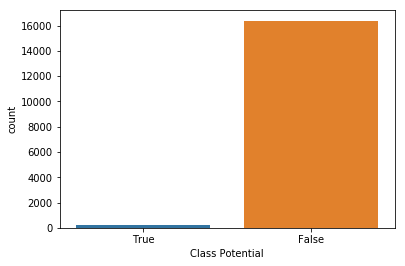

In [13]:
#Visual how many players have potential false & true
tf= sns.countplot(x="Class Potential", data=df1)
df1['Class Potential'].value_counts()

## Plots

C:\Users\juan_\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


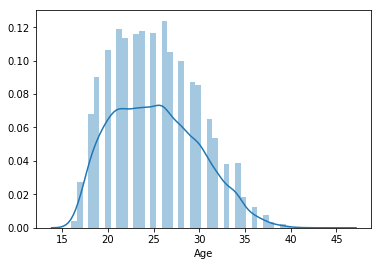

In [14]:
#Histogram of the players by Age
age_plot = sns.distplot(df1['Age'])

((array([-3.93471866, -3.71627356, -3.59664278, ...,  3.59664278,
          3.71627356,  3.93471866]),
  array([48, 50, 50, ..., 94, 94, 95], dtype=int64)),
 (6.126243047690091, 71.14090007811092, 0.9957140148039096))

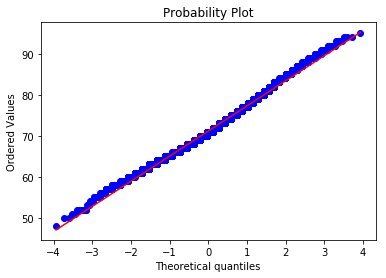

In [15]:
#QQ plot of Potential
stats.probplot(df1['Potential'], plot=sns.mpl.pyplot)

In [16]:
#Shapiro-Wilk test of normality
stat, p = shapiro(df1['Potential'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.991, p=0.000
Sample does not look Gaussian (reject H0)


C:\Users\juan_\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [17]:
# D’Agostino’s K^2 test of normality
stat, p = normaltest(df1['Potential'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=263.784, p=0.000
Sample does not look Gaussian (reject H0)


In [18]:
# Anderson-Darling test of normality
result = anderson(df1['Potential'])
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
    else:
        print('Alpha = %.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 47.626
Alpha = 15.000: 0.576, data does not look normal (reject H0)
Alpha = 10.000: 0.656, data does not look normal (reject H0)
Alpha = 5.000: 0.787, data does not look normal (reject H0)
Alpha = 2.500: 0.918, data does not look normal (reject H0)
Alpha = 1.000: 1.092, data does not look normal (reject H0)


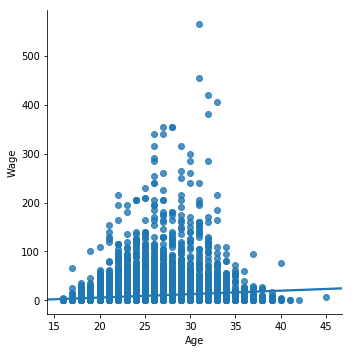

In [19]:
#Visualize the regresion of wage depends on Age 
g = sns.lmplot(x="Age", y="Wage", data=df1)

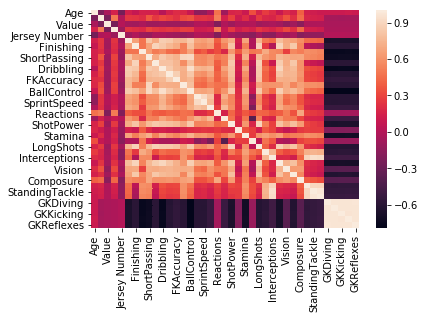

In [131]:
corr = df1.corr()
 
# Heatmap
sns.heatmap(corr)

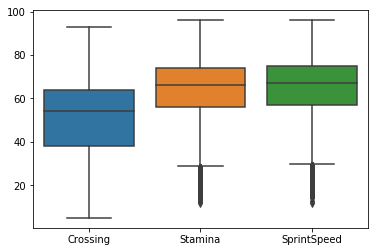

In [20]:
#Boxplot
sns.boxplot(data=df1[['Crossing', 'Stamina', 'SprintSpeed']])

C:\Users\juan_\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


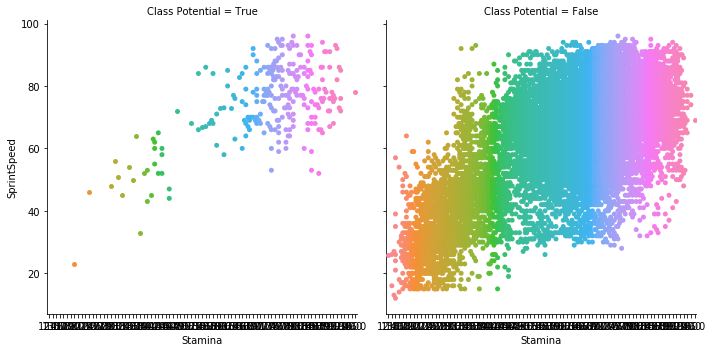

In [21]:
# Factor Plot
g = sns.factorplot(x='Stamina', 
                   y='SprintSpeed', 
                   data=df1, 
                   col='Class Potential',
                   kind='swarm')
 
# Rotate x-axis labels
g.set_xticklabels(rotation=0)


## Final Data

In [39]:
df2=df1.loc[df1['Class Potential']=='True']
df2=df2.iloc[:,[0,1,2,3,4,6,8,19,20,21,22,27]]
df2.to_csv("data_final.csv", encoding='utf-8', index=False) 